
# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [2]:
# loading the data:
customers = pd.read_csv('../Wholesale customers data.csv')

#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
Channel             440 non-null int64
Region              440 non-null int64
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicassen          440 non-null int64
dtypes: int64(8)
memory usage: 27.6 KB
None
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64
          Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000   

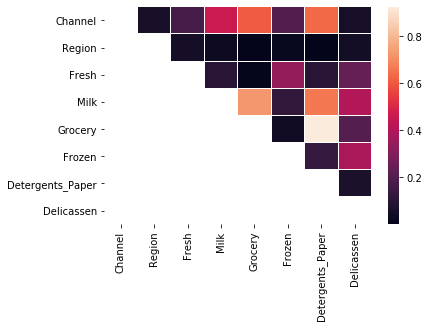

In [14]:
display(customers.head())
print(customers.info())
print(customers.isna().sum())
print(customers.describe())

corr = customers.corr()
# sns.heatmap(corr, linewidths=.01)
a = corr.abs()

upper = corr.abs().where(np.triu(np.ones(corr.abs().shape), k=1).astype(np.bool))
sns.heatmap(upper, linewidths=.01);

high_corr = [col for col in upper.columns if any(upper[col] > 0.92)]
print('\n\nHigh Correlations:', high_corr)


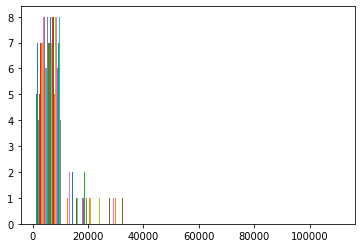

In [4]:
# wine_df = pd.DataFrame(wine.data)
plt.hist(customers)
plt.show()

#The data is skewed to the right. 

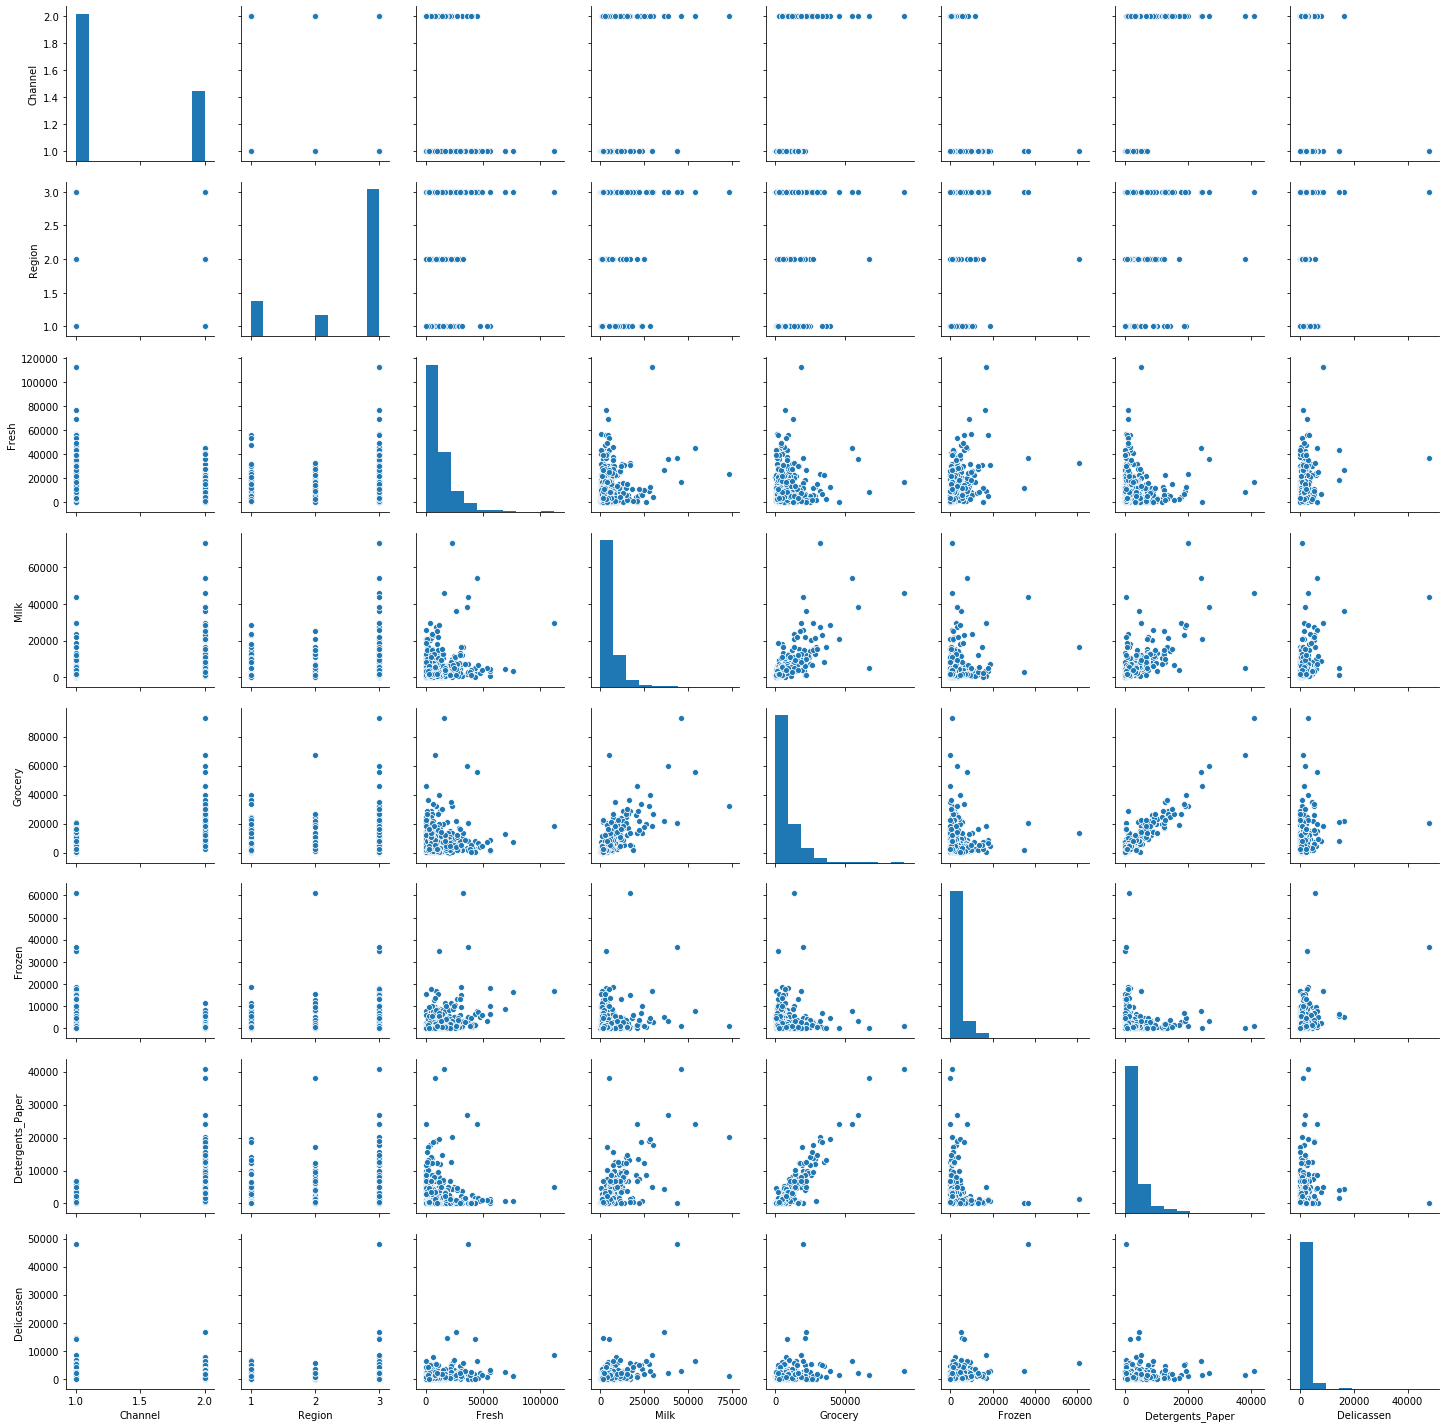

In [5]:
sns.pairplot(customers);


In [ ]:
#According to the pairplot, we can find some outliers in the dataset. 

In [ ]:
totals = customers.groupby('Region').sum()

In [45]:
totals

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Region,,,,,,,
1,95,854833,422454,570037,231026,204136,104327
2,66,464721,239144,433274,190132,173311,54506
3,421,3960577,1888759,2495251,930492,890410,512110


In [10]:
print('REGION:\n')
for i in totals.columns:
    print(i,':')
    print((totals[i].max()/sum(customers[i])*100).round(2), '%\n')

#There is any value fulfilling the pareto principle grouping by Region.

REGION:

Channel :
72.34 %

Fresh :
75.01 %

Milk :
74.06 %

Grocery :
71.32 %

Frozen :
68.84 %

Detergents_Paper :
70.23 %

Delicassen :
76.33 %



In [ ]:
# If we base our pairplot in other variables such as Channel, we might find some pareto principle fulfillments. But the one that makes more sense to me is basing on Region, where we cannot find any pareto achievements.



# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [ ]:
# Your code here

In [ ]:
# At the moment I wouldn't drop any column.

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [26]:
customers.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [62]:
# Your import here:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
customers_scale = pd.DataFrame(scaler.fit_transform(customers[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']]))
customers_scale = pd.concat([customers_scale, customers[['Channel', 'Region']]], axis = 'columns')

# test_dummy_merged = pd.concat([data_test_copy, dummies_merged_test], axis = 'columns')

# Challenge 3 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [64]:
from sklearn.cluster import KMeans


In [65]:
kmeans = KMeans(n_clusters = 4).fit(customers_scale)

Count the values in `labels`.

In [66]:
customers['labels'] = kmeans.labels_
customers['labels'].value_counts()

1    315
0    113
3     10
2      2
Name: labels, dtype: int64

# Challenge 4 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [67]:
from sklearn.cluster import DBSCAN

In [68]:
clustering = DBSCAN(eps=0.5).fit(customers_scale)
customers['labels_DBSCAN'] = clustering.labels_

Count the values in `labels_DBSCAN`.

In [69]:
customers['labels_DBSCAN'].value_counts()

-1    255
 1    130
 5     22
 4      7
 6      6
 2      5
 7      5
 3      5
 0      5
Name: labels_DBSCAN, dtype: int64

In [71]:
customers.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels,labels_DBSCAN
0,2,3,12669,9656,7561,214,2674,1338,0,-1
1,2,3,7057,9810,9568,1762,3293,1776,0,-1
2,2,3,6353,8808,7684,2405,3516,7844,0,-1
3,1,3,13265,1196,4221,6404,507,1788,1,1
4,2,3,22615,5410,7198,3915,1777,5185,1,-1


# Challenge 5 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

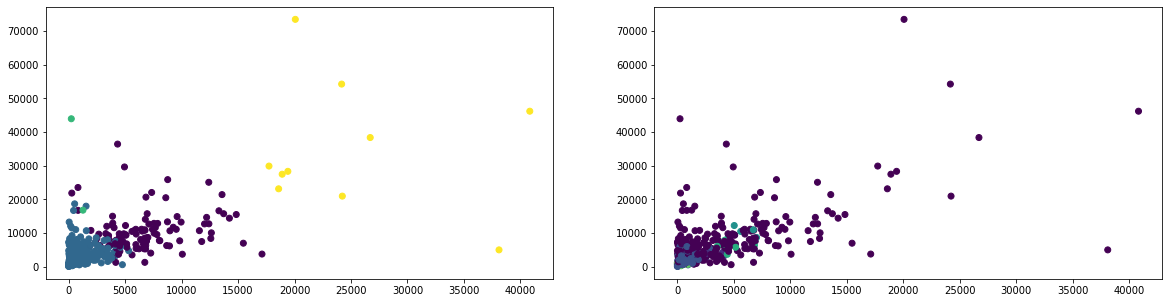

In [85]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.scatter(customers['Detergents_Paper'],customers['Milk'], c = customers.labels)
plt.subplot(1,2,2)
plt.scatter(customers['Detergents_Paper'],customers['Milk'], c = customers.labels_DBSCAN);

Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

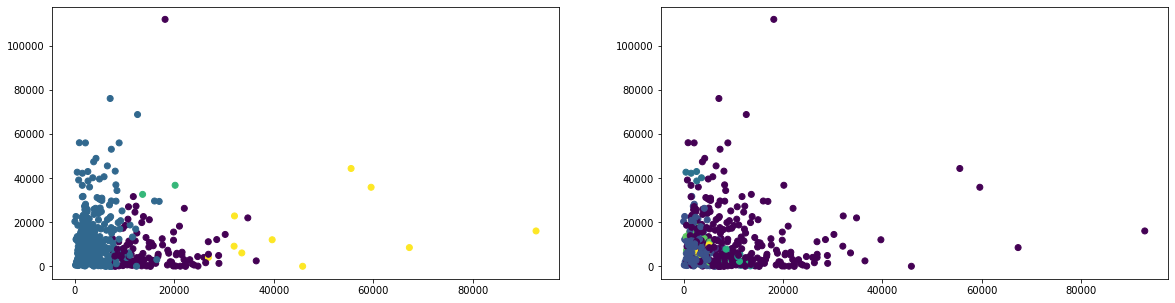

In [86]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.scatter(customers['Grocery'],customers['Fresh'], c = customers.labels)
plt.subplot(1,2,2)
plt.scatter(customers['Grocery'],customers['Fresh'], c = customers.labels_DBSCAN);

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

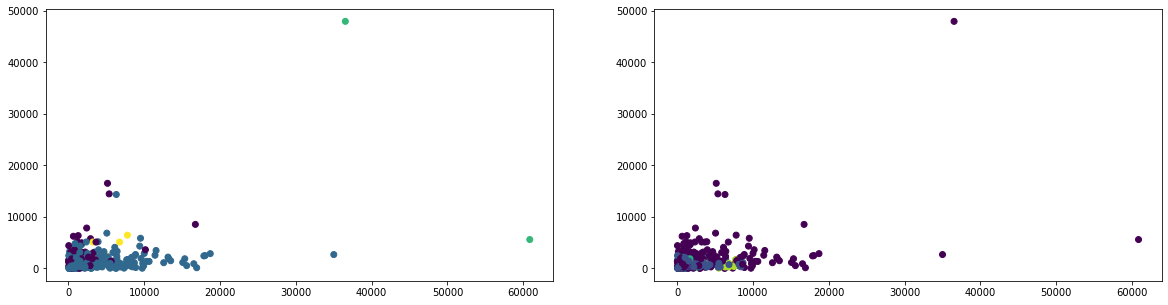

In [87]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.scatter(customers['Frozen'],customers['Delicassen'], c = customers.labels)
plt.subplot(1,2,2)
plt.scatter(customers['Frozen'],customers['Delicassen'], c = customers.labels_DBSCAN);

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [98]:
mean_groupby_labels = customers.groupby('labels').mean()
display(mean_groupby)

for i in mean_groupby_labels.columns:
    highest_values = mean_groupby_labels[i].max()
    lowest_values = mean_groupby_labels[i].min()
    a = mean_groupby_labels[mean_groupby_labels[i]==highest_values].index[0]
    b = mean_groupby_labels[mean_groupby_labels[i]==lowest_values].index[0]
    print('Label K-Means max {} and min {}, {}: {}'.format(a,b, i, highest_values-lowest_values))

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels_DBSCAN
labels,,,,,,,,,
0,1.929204,2.628319,7751.663717,10327.699115,15714.265487,1606.920354,6674.522124,1964.407080,-0.513274
1,1.085714,2.514286,13253.904762,3096.850794,3821.222222,3308.314286,836.104762,1161.857143,0.568254
2,1.000000,2.500000,34782.000000,30367.000000,16898.000000,48701.500000,755.500000,26776.000000,-1.000000
3,2.000000,2.500000,15964.900000,34708.500000,48536.900000,3054.600000,24875.200000,2942.800000,-1.000000


Label K-Means max 3 and min 2, Channel: 1.0
Label K-Means max 0 and min 2, Region: 0.12831858407079633
Label K-Means max 2 and min 0, Fresh: 27030.33628318584
Label K-Means max 3 and min 1, Milk: 31611.649206349208
Label K-Means max 3 and min 1, Grocery: 44715.67777777778
Label K-Means max 2 and min 0, Frozen: 47094.5796460177
Label K-Means max 3 and min 2, Detergents_Paper: 24119.7
Label K-Means max 2 and min 1, Delicassen: 25614.14285714286
Label K-Means max 1 and min 2, labels_DBSCAN: 1.5682539682539682


In [99]:
mean_groupby_labels_DBSCAN = customers.groupby('labels_DBSCAN').mean()
mean_groupby_labels_DBSCAN

for i in mean_groupby_labels_DBSCAN.columns:
    highest_values = mean_groupby_labels_DBSCAN[i].max()
    lowest_values = mean_groupby_labels_DBSCAN[i].min()
    a = mean_groupby_labels_DBSCAN[mean_groupby_labels_DBSCAN[i]==highest_values].index[0]
    b = mean_groupby_labels_DBSCAN[mean_groupby_labels_DBSCAN[i]==lowest_values].index[0]
    print('Label DBSCAN max {} and min {}, {}: {}'.format(a,b, i, highest_values-lowest_values))

Label DBSCAN max 0 and min 1, Channel: 1.0
Label DBSCAN max 0 and min 5, Region: 2.0
Label DBSCAN max 2 and min 3, Fresh: 39089.4
Label DBSCAN max 3 and min 2, Milk: 8803.599999999999
Label DBSCAN max 3 and min 5, Grocery: 9701.118181818181
Label DBSCAN max 6 and min 3, Frozen: 6170.733333333333
Label DBSCAN max 3 and min 7, Detergents_Paper: 5552.6
Label DBSCAN max -1 and min 0, Delicassen: 1822.270588235294
Label DBSCAN max 0 and min 3, labels: 1.0


Which algorithm appears to perform better?

In [ ]:
# Any of them. But looking at the graphs I'd select K-Means. 

# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

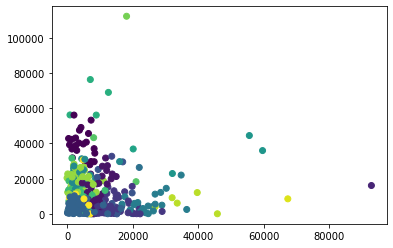

In [116]:
kmeans_testing = KMeans(n_clusters = 20).fit(customers_scale)
customers['labels_test'] = kmeans_testing.labels_
customers['labels_test'].value_counts()
plt.scatter(customers['Grocery'],customers['Fresh'], c = customers.labels_test);

In [ ]:
# It doesn't change. The dataset seems not to be the best one for clustering

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

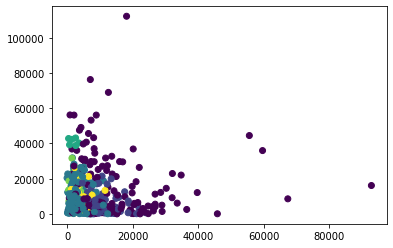

In [126]:
clustering_test = DBSCAN(eps=0.7).fit(customers_scale)
customers['labels_DBSCAN'] = clustering_test.labels_
plt.scatter(customers['Grocery'],customers['Fresh'], c = customers.labels_DBSCAN);

In [ ]:
#The same as before. 